In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
from problem import Domain, Fokker_Planck_2d
from my_utils import  plot_domain_2d, plot_2d_tri
from scipy.stats import qmc


In [3]:
domain = Domain(domain_range=(0,1,-2,2,-2,2),domain_shape='box')
print(domain.domain_range)
sampler = qmc.Halton(d=3, scramble=True)
sample_size_pde = 10000
sample_size_test = 2000
x_pde = sampler.random(n=sample_size_pde)*2 - 1
x_test = sampler.random(n=sample_size_test)*2 - 1
x_bd = domain.sample_nd_mesh_bd(mesh_vec=[20,50,50])

x_pde = domain.shift2range(x_pde)
x_test = domain.shift2range(x_test)
x_bd = domain.shift2range(x_bd)


x_bd = x_bd[x_bd[:,0]<1]
print(x_pde.shape)
print(x_bd.shape)
print(x_test.shape)

[[ 0  1]
 [-2  2]
 [-2  2]]
(10000, 3)
(6300, 3)
(2000, 3)


(2700, 3)


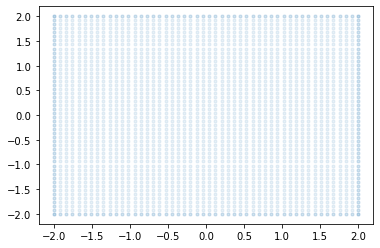

In [8]:

temp = x_bd[x_bd[:,0]==0,:]
print(temp.shape)
plt.plot(temp[:,1],temp[:,2],'.',alpha=0.1)
plt.show()

In [5]:
my_prob = Fokker_Planck_2d(case=2)
x,u = my_prob.check_solution(x_pde)
# plot_2d_tri(x[:,0], x[:,1], u[:,0])
target_pde = my_prob.rhs(x_pde)
target_bd = my_prob.u_exact(x_bd)
target_test = my_prob.u_exact(x_test)

my_prob.set_data(x_pde=x_pde, x_test=x_test, x_bd=x_bd,
                 target_pde=target_pde, target_test=target_test, target_bd=target_bd)
print(my_prob)

pde rmse: 3.1625423340346985e-17
***************************************************
Fokker_Planck (case=2):
	x_pde:   	(10000, 3)
	x_bd:    	(6300, 3)
	x_ic:    	None
	x_test:    	(2000, 3)
***************************************************


In [6]:
np.savez('data/data', x_pde=x_pde, x_bd=x_bd, x_test=x_test,
         target_pde=target_pde, target_bd=target_bd, target_test=target_test)